# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [52]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
# Save config information for the Open Weather api.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = url + "appid=" + weather_api_key + "&q="

# set up lists to hold reponse info
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for city in cities:

    response = requests.get(query_url + city + "&units=" + units).json()

 # Try to append lists if the city is found
    try:
        city_name.append(response["name"])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {(cities.index(city))} out of {str(len(cities))} - Appending stats for {city}")
    except KeyError:
        print(f"City not found! Skipping")
        pass
    
print("---------------------------")
print("Data Retrieval Complete")

Processing Record 0 out of 632 - Appending stats for hobart
Processing Record 1 out of 632 - Appending stats for kristiinankaupunki
Processing Record 2 out of 632 - Appending stats for bluff
Processing Record 3 out of 632 - Appending stats for rikitea
Processing Record 4 out of 632 - Appending stats for luderitz
Processing Record 5 out of 632 - Appending stats for bengkulu
Processing Record 6 out of 632 - Appending stats for khasan
Processing Record 7 out of 632 - Appending stats for warrington
Processing Record 8 out of 632 - Appending stats for albany
Processing Record 9 out of 632 - Appending stats for kalevala
Processing Record 10 out of 632 - Appending stats for longyearbyen
Processing Record 11 out of 632 - Appending stats for kavieng
Processing Record 12 out of 632 - Appending stats for burns lake
Processing Record 13 out of 632 - Appending stats for hilo
Processing Record 14 out of 632 - Appending stats for grindavik
Processing Record 15 out of 632 - Appending stats for busselt

Processing Record 137 out of 632 - Appending stats for nador
Processing Record 138 out of 632 - Appending stats for severo-kurilsk
Processing Record 139 out of 632 - Appending stats for carnarvon
Processing Record 140 out of 632 - Appending stats for buala
Processing Record 141 out of 632 - Appending stats for east london
Processing Record 142 out of 632 - Appending stats for ponta do sol
Processing Record 143 out of 632 - Appending stats for lloro
Processing Record 144 out of 632 - Appending stats for egvekinot
Processing Record 145 out of 632 - Appending stats for poum
Processing Record 146 out of 632 - Appending stats for inuvik
City not found! Skipping
Processing Record 148 out of 632 - Appending stats for dzhebariki-khaya
Processing Record 149 out of 632 - Appending stats for viedma
Processing Record 150 out of 632 - Appending stats for kyshtovka
Processing Record 151 out of 632 - Appending stats for torbay
Processing Record 152 out of 632 - Appending stats for sao filipe
Processi

Processing Record 271 out of 632 - Appending stats for waitakere
Processing Record 272 out of 632 - Appending stats for babaeski
Processing Record 273 out of 632 - Appending stats for mandera
Processing Record 274 out of 632 - Appending stats for terra santa
Processing Record 275 out of 632 - Appending stats for dakar
Processing Record 276 out of 632 - Appending stats for nesna
Processing Record 277 out of 632 - Appending stats for meulaboh
Processing Record 278 out of 632 - Appending stats for kitimat
Processing Record 279 out of 632 - Appending stats for provideniya
Processing Record 280 out of 632 - Appending stats for saint-louis
Processing Record 281 out of 632 - Appending stats for pimentel
Processing Record 282 out of 632 - Appending stats for tahe
Processing Record 283 out of 632 - Appending stats for port keats
Processing Record 284 out of 632 - Appending stats for ola
Processing Record 285 out of 632 - Appending stats for fortuna
Processing Record 286 out of 632 - Appending s

Processing Record 406 out of 632 - Appending stats for constitucion
Processing Record 407 out of 632 - Appending stats for souillac
Processing Record 408 out of 632 - Appending stats for novobirilyussy
Processing Record 409 out of 632 - Appending stats for parambu
Processing Record 410 out of 632 - Appending stats for saint-georges
Processing Record 411 out of 632 - Appending stats for ahuimanu
Processing Record 412 out of 632 - Appending stats for port lincoln
Processing Record 413 out of 632 - Appending stats for cam ranh
Processing Record 414 out of 632 - Appending stats for seydi
Processing Record 415 out of 632 - Appending stats for baykit
Processing Record 416 out of 632 - Appending stats for raudeberg
Processing Record 417 out of 632 - Appending stats for camocim
Processing Record 418 out of 632 - Appending stats for aswan
Processing Record 419 out of 632 - Appending stats for loa janan
City not found! Skipping
Processing Record 421 out of 632 - Appending stats for san andres
Pr

Processing Record 537 out of 632 - Appending stats for hereford
Processing Record 538 out of 632 - Appending stats for balakhninskiy
Processing Record 539 out of 632 - Appending stats for okhotsk
Processing Record 540 out of 632 - Appending stats for xinxiang
Processing Record 541 out of 632 - Appending stats for anloga
Processing Record 542 out of 632 - Appending stats for belgrade
Processing Record 543 out of 632 - Appending stats for takoradi
Processing Record 544 out of 632 - Appending stats for hobyo
Processing Record 545 out of 632 - Appending stats for saint anthony
Processing Record 546 out of 632 - Appending stats for namur
Processing Record 547 out of 632 - Appending stats for flin flon
Processing Record 548 out of 632 - Appending stats for bilibino
Processing Record 549 out of 632 - Appending stats for victoria
Processing Record 550 out of 632 - Appending stats for udachnyy
Processing Record 551 out of 632 - Appending stats for mopipi
Processing Record 552 out of 632 - Appen

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [175]:
#Convert Raw data to DataFrame

df = pd.DataFrame({
    'City': city_name,
    'Latitude': lat,
    'Longitude': lng,
    'Max temperature': max_temp,
   'Humidity' : humidity,
    'Cloudiness' :cloudiness,
    'Wind Speed' :wind_speed,
    'Country' : country,
    'Date' : date,
})

#Exporting the DataFrame into a csv
df.to_csv('output_data/cities_weather.csv')
df.count()

City               591
Latitude           591
Longitude          591
Max temperature    591
Humidity           591
Cloudiness         591
Wind Speed         591
Country            591
Date               591
dtype: int64

In [176]:
df.head()

,City,Latitude,Longitude,Max temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,51.80,66,20,10.29,AU,1593397216
1,Kristinestad,62.27,21.38,61.75,86,67,9.60,FI,1593397216
2,Bluff,-46.60,168.33,48.65,81,96,14.85,NZ,1593397216
3,Rikitea,-23.12,-134.97,68.54,55,31,17.96,PF,1593397217
4,Lüderitz,-26.65,15.16,58.24,54,0,13.53,NA,1593397217


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [177]:
sort_df = df.sort_values("Humidity", ascending = False)
sort_df.head()

#There are no cities with humidity > 100%

,City,Latitude,Longitude,Max temperature,Humidity,Cloudiness,Wind Speed,Country,Date
342,Ancud,-41.87,-73.82,46.00,100,90,3.36,CL,1593397352
141,Broome,42.25,-75.83,66.99,100,0,2.86,US,1593397271
363,Valdemārpils,57.37,22.59,64.40,100,90,3.36,LV,1593397359
83,Cayenne,4.93,-52.33,75.20,100,20,7.70,GF,1593397247
297,Mar del Plata,-38.00,-57.56,48.00,100,96,5.53,AR,1593397145


In [178]:
#  Get the indices of cities that have humidity over 100%.
#NA

In [179]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [180]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

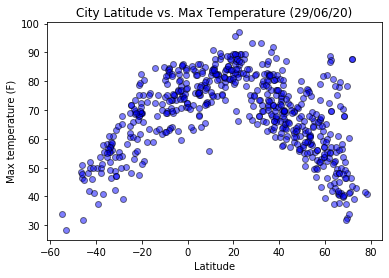

In [182]:
x = df["Latitude"] 
y = df["Max temperature"]

plt.scatter(x,y, color='blue', edgecolor = 'black', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.title('City Latitude vs. Max Temperature (29/06/20)')
plt.savefig('images/Latitude_vs_MaxTemp.png')
plt.show()

There is a strong relationship between the latitude and max temperature of cities. The further from the equator the colder they are. However the hottest cities are not on the equator line but at a latitude at around +20.

## Latitude vs. Humidity Plot

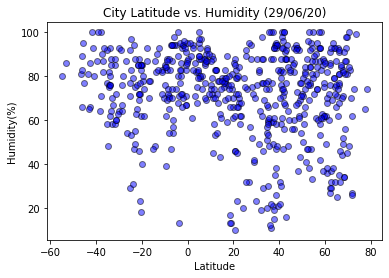

In [183]:
x = df["Latitude"] 
y = df["Humidity"]

plt.scatter(x,y, color='blue', edgecolor = 'black', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity (29/06/20)')
plt.savefig("images/latitude_vs_humidity.png")
plt.show()

There isn't really a relationship between latidue of cities and their humidity level.

## Latitude vs. Cloudiness Plot

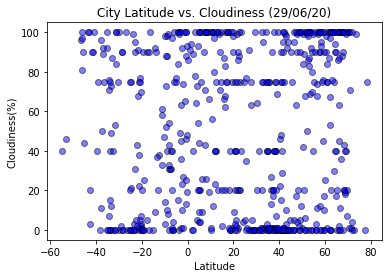

In [184]:
x = df["Latitude"] 
y = df["Cloudiness"]

plt.scatter(x,y, color='blue', edgecolor = 'black', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness (29/06/20)')
plt.savefig("images/latitude_vs_cloudiness.png")
plt.show()

There isn't any relationship between latitude and cloudiness in cities.

## Latitude vs. Wind Speed Plot

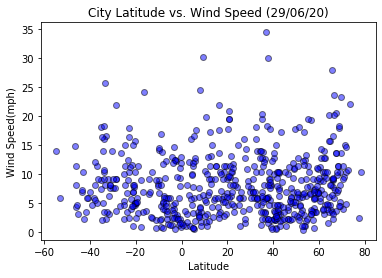

In [185]:
x = df["Latitude"] 
y = df["Wind Speed"]

plt.scatter(x,y, color='blue', edgecolor = 'black', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('City Latitude vs. Wind Speed (29/06/20)')
plt.savefig("images/latitude_vs_windspeed.png")
plt.show()

There isn't any relationship between latitude and wind speed.

## Linear Regression

In [153]:
# OPTIONAL: Create a function to create Linear Regression plots
def linereg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(5,32),fontsize=15,color="red")
    plt.scatter(x_values,y_values, alpha=0.5)
    plt.plot(x_values,regress_values,"r-")
    return print(f"The r-squared is: {rvalue**2}")
    return plt.show()

In [154]:
# Create Northern and Southern Hemisphere DataFrames

#Northern Hemisphere DataFrame
north_df = df.loc[df['Latitude']> 0]
north_df.count()

City               415
Latitude           415
Longitude          415
Max temperature    415
Humidity           415
Cloudiness         415
Wind Speed         415
Country            415
Date               415
dtype: int64

In [155]:
#Southern Hemisphere DataFrame
south_df = df.loc[df['Latitude']<= 0]
south_df.count()

City               176
Latitude           176
Longitude          176
Max temperature    176
Humidity           176
Cloudiness         176
Wind Speed         176
Country            176
Date               176
dtype: int64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47087841197633445


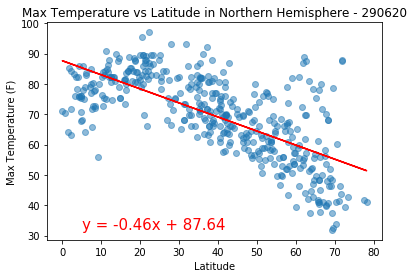

In [156]:
x= north_df['Latitude']
y= north_df['Max temperature']

linereg_plot(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temperature vs Latitude in Northern Hemisphere - 290620')
plt.savefig('images/NH_Maxtemp_vs_Latitude.png')

There is a negative relationship between latitude and max temperature in the Northern hemisphere. However the r-squared is not that strong. By watching this scatter plot, it looks like the relationship between latitude and temperature would be much stronger if we were taking in account cities with a latitude superior or equal to 20.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6783621501352078


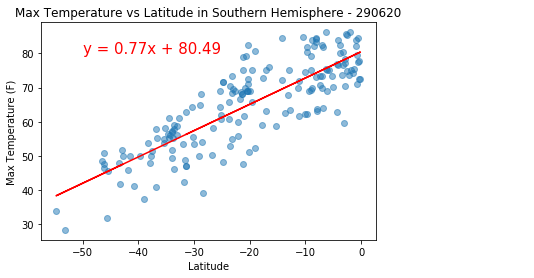

In [157]:
x= south_df['Latitude']
y= south_df['Max temperature']

linereg_plot(x,y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temperature vs Latitude in Southern Hemisphere - 290620')
plt.savefig('images/SH_Maxtemp_vs_Latitude.png')

There is a much stronger relationship between the latitude and the max temperature in the Southern hemisphere. The r-squared number is above 0.50.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0060496587614822794


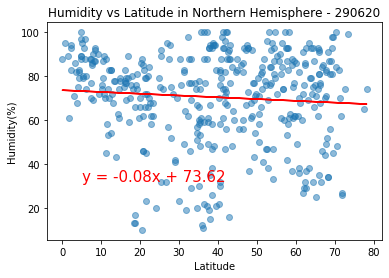

In [158]:
x= north_df['Latitude']
y= north_df['Humidity']

linereg_plot(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Humidity vs Latitude in Northern Hemisphere - 290620')
plt.savefig('images/NH_Humidity_vs_Latitude.png')

There isn't any relationship between humidity and latitude of cities in the Northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 9.711043888945783e-05


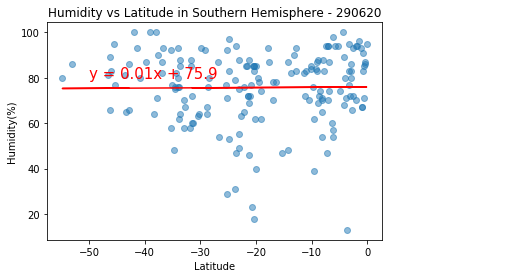

In [159]:
x= south_df['Latitude']
y= south_df['Humidity']

linereg_plot(x,y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Humidity vs Latitude in Southern Hemisphere - 290620')
plt.savefig('images/SH_Humidity_vs_Latitude.png')

There isn't any relationship between humidity and latitude of cities in the Southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0008052581175850228


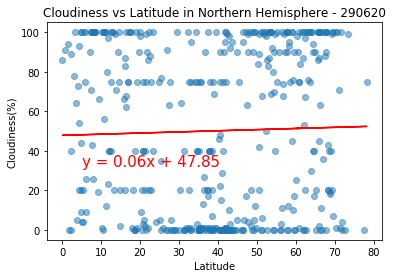

In [160]:
x= north_df['Latitude']
y= north_df['Cloudiness']

linereg_plot(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Cloudiness vs Latitude in Northern Hemisphere - 290620')
plt.savefig('images/NH_Cloudiness_vs_Latitude.png')

There isn't any relationship between cloudiness and latitude of cities in the Northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0027609802723929195


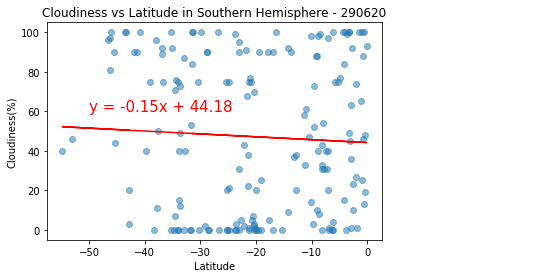

In [162]:
x= south_df['Latitude']
y= south_df['Cloudiness']

linereg_plot(x,y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Cloudiness vs Latitude in Southern Hemisphere - 290620')
plt.savefig('images/SH_Cloudiness_vs_Latitude.png')

There isn't any relationship between cloudiness and latitude in the Southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0043581807720388535


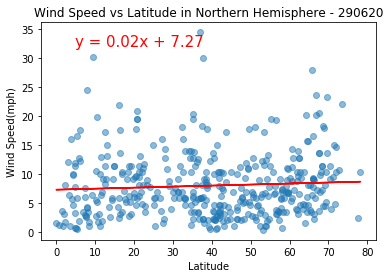

In [163]:
x= north_df['Latitude']
y= north_df['Wind Speed']

linereg_plot(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Wind Speed vs Latitude in Northern Hemisphere - 290620')
plt.savefig('images/NH_WindSpeed_vs_Latitude.png')

There isn't any relationship between wind speed and latitude in the Northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04319077313151865


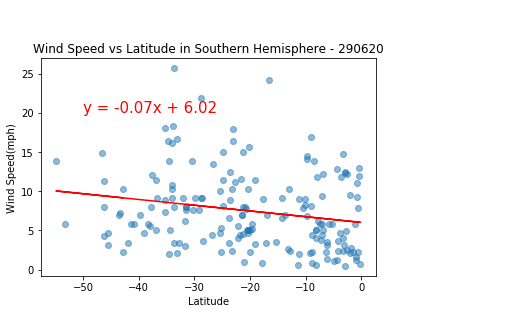

In [164]:
x= south_df['Latitude']
y= south_df['Wind Speed']

linereg_plot(x,y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Wind Speed vs Latitude in Southern Hemisphere - 290620')
plt.savefig('images/SH_Wind Speed_vs_Latitude.png')

There isn't any relationship between wind speed and latitude in the Southern hemisphere.

Observable trends:

Thanks to this analysis, there is a strong relationship between the latitude and max temperature of cities. The further the cities are from the equator, the colder the cities tend to be. However the hottest cities are not on the equator line but at a latitude at around +20.

When comparing the latitude vs max temperature in the Northern hemisphere and the Southern hemisphere, the linear regression model shows:
     - there is a negative relationship in the Northern hemisphere. 
     - there is a positive relationship in the Southern hemisphere.   
 
In addition, the relationship and r-squared are much stronger in the Southern Hemisphere.
 
By looking at the first scatter plot latitude vs max. temperature, we can see the cities with the highest temperatures are located on the latitude +20. Therefore the relationship between latitude and temperature would be much stronger if we were grouping cities with a latitude superior to 20 and cities with a latitude inferior to 20 instead of looking at Northen hemisphere and Southern hemisphere.

In regards to the other parameters, there isn't any strong relationship between latitude and cloudiness, humidity, or wind speed.